In [93]:
%pylab inline

import numpy as np
from scipy.optimize import curve_fit
import scipy.linalg as lin
import scipy.stats as sst
#import pylab
from StringIO import StringIO

Populating the interactive namespace from numpy and matplotlib


In [116]:
age=np.array([0,0,16,16,16,2,2,32,32,4,4,4,4,8,8,8,8]);

crs = open("all.ico6.areaMap.txt", "r");
d1=crs.read();
data=np.genfromtxt(StringIO(d1),delimiter="\t",skip_header=1);

In [117]:
age=np.concatenate([age[:7],age[9:]])
data=np.concatenate([data[:,:7],data[:,9:]],axis=1)

# Fit an exponential, asymptotic growth model to each vertex

In [121]:
def func(x, p1,p2):
  return p1*(1-np.exp(-x/p2))

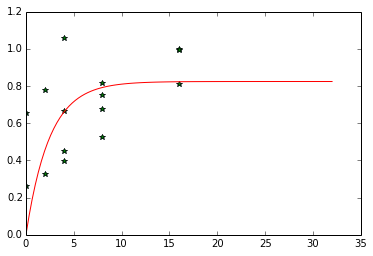

In [122]:
i=7;
xdata=np.array(age);
ydata=np.array(data[i,:])
popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))
pylab.plot(xdata,ydata,'*')
curvex=np.linspace(0,32,100)
curvey=func(curvex,popt[0],popt[1])
plt.plot(xdata,ydata,'*')
plt.plot(curvex,curvey,'r')

In [124]:
fo=open("areagrowth.tau.txt","w");
fo.write("%i\n"%len(data));
xdata=np.array(age);
np.seterr(all='ignore')
for i in range(0,len(data)):
    ydata=np.array(data[i,:])
    popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))
    fo.write("%f\n" % popt[1]);
fo.close();

In [126]:
fo=open("areagrowth.asymp.txt","w");
fo.write("%i\n"%len(data));
xdata=np.array(age);
np.seterr(all='ignore')
for i in range(0,len(data)):
    ydata=np.array(data[i,:])
    popt, pcov = curve_fit(func, xdata, ydata,p0=(1.0,0.2))
    fo.write("%f\n" % popt[0]);
fo.close();

# Compute area ratio change from P0 to P16

In [125]:
fo=open("arearatio.32over0.txt","w");
fo.write("%i\n"%len(data));
np.seterr(all='ignore')
for i in range(0,len(data)):
    fo.write("%f\n" % ((data[i,2]+data[i,3])/(data[i,0]+data[i,1])));
fo.close();